Подключим библиотеки:

In [94]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split

Работа с набором данных:

In [95]:
PATH = "tr.csv"
dataset = pd.read_csv(PATH)
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0
...,...,...,...,...,...,...
709,0,3,1,39.0,0,5
710,0,2,0,27.0,0,0
711,1,1,1,19.0,0,0
712,1,1,0,26.0,0,0


Проверим признаки на значимость и корреляцию:

<Axes: >

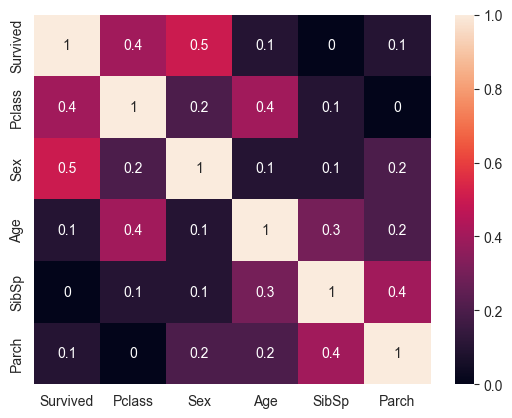

In [96]:
sns.heatmap(
    round(
        abs(dataset.corr()),
        1
    ),
    annot=True
)

Разделим данные на тестовые и тренировочные:

In [97]:
train_input, test_input, train_output, test_output = train_test_split(
    dataset.drop(['Pclass'], axis=1),
    dataset['Pclass'],
    test_size=0.2
)

Построим модель дерева решений, а также выведем матрицу сходства предсказанных значений тестового набора и эталонных значений:

Text(0.5, 1.0, 'Матрица сходства')

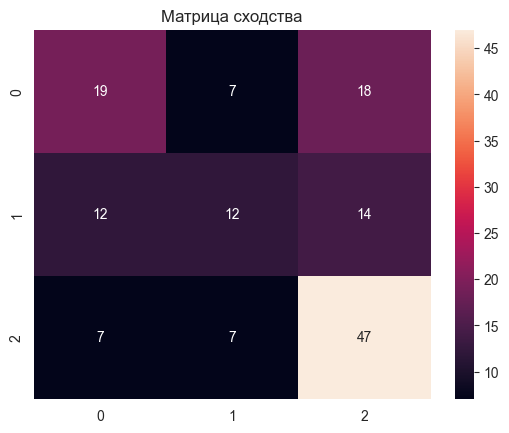

In [98]:
model = tree.DecisionTreeClassifier()
model.fit(train_input, train_output)

predictions = model.predict(test_input)
confusion_matrix = sklearn.metrics.confusion_matrix(predictions, test_output)

sns.heatmap(confusion_matrix, annot=True)
plt.title("Матрица сходства")

Получим само дерево решений:

Text(0.5, 1.0, 'Дерево решений')

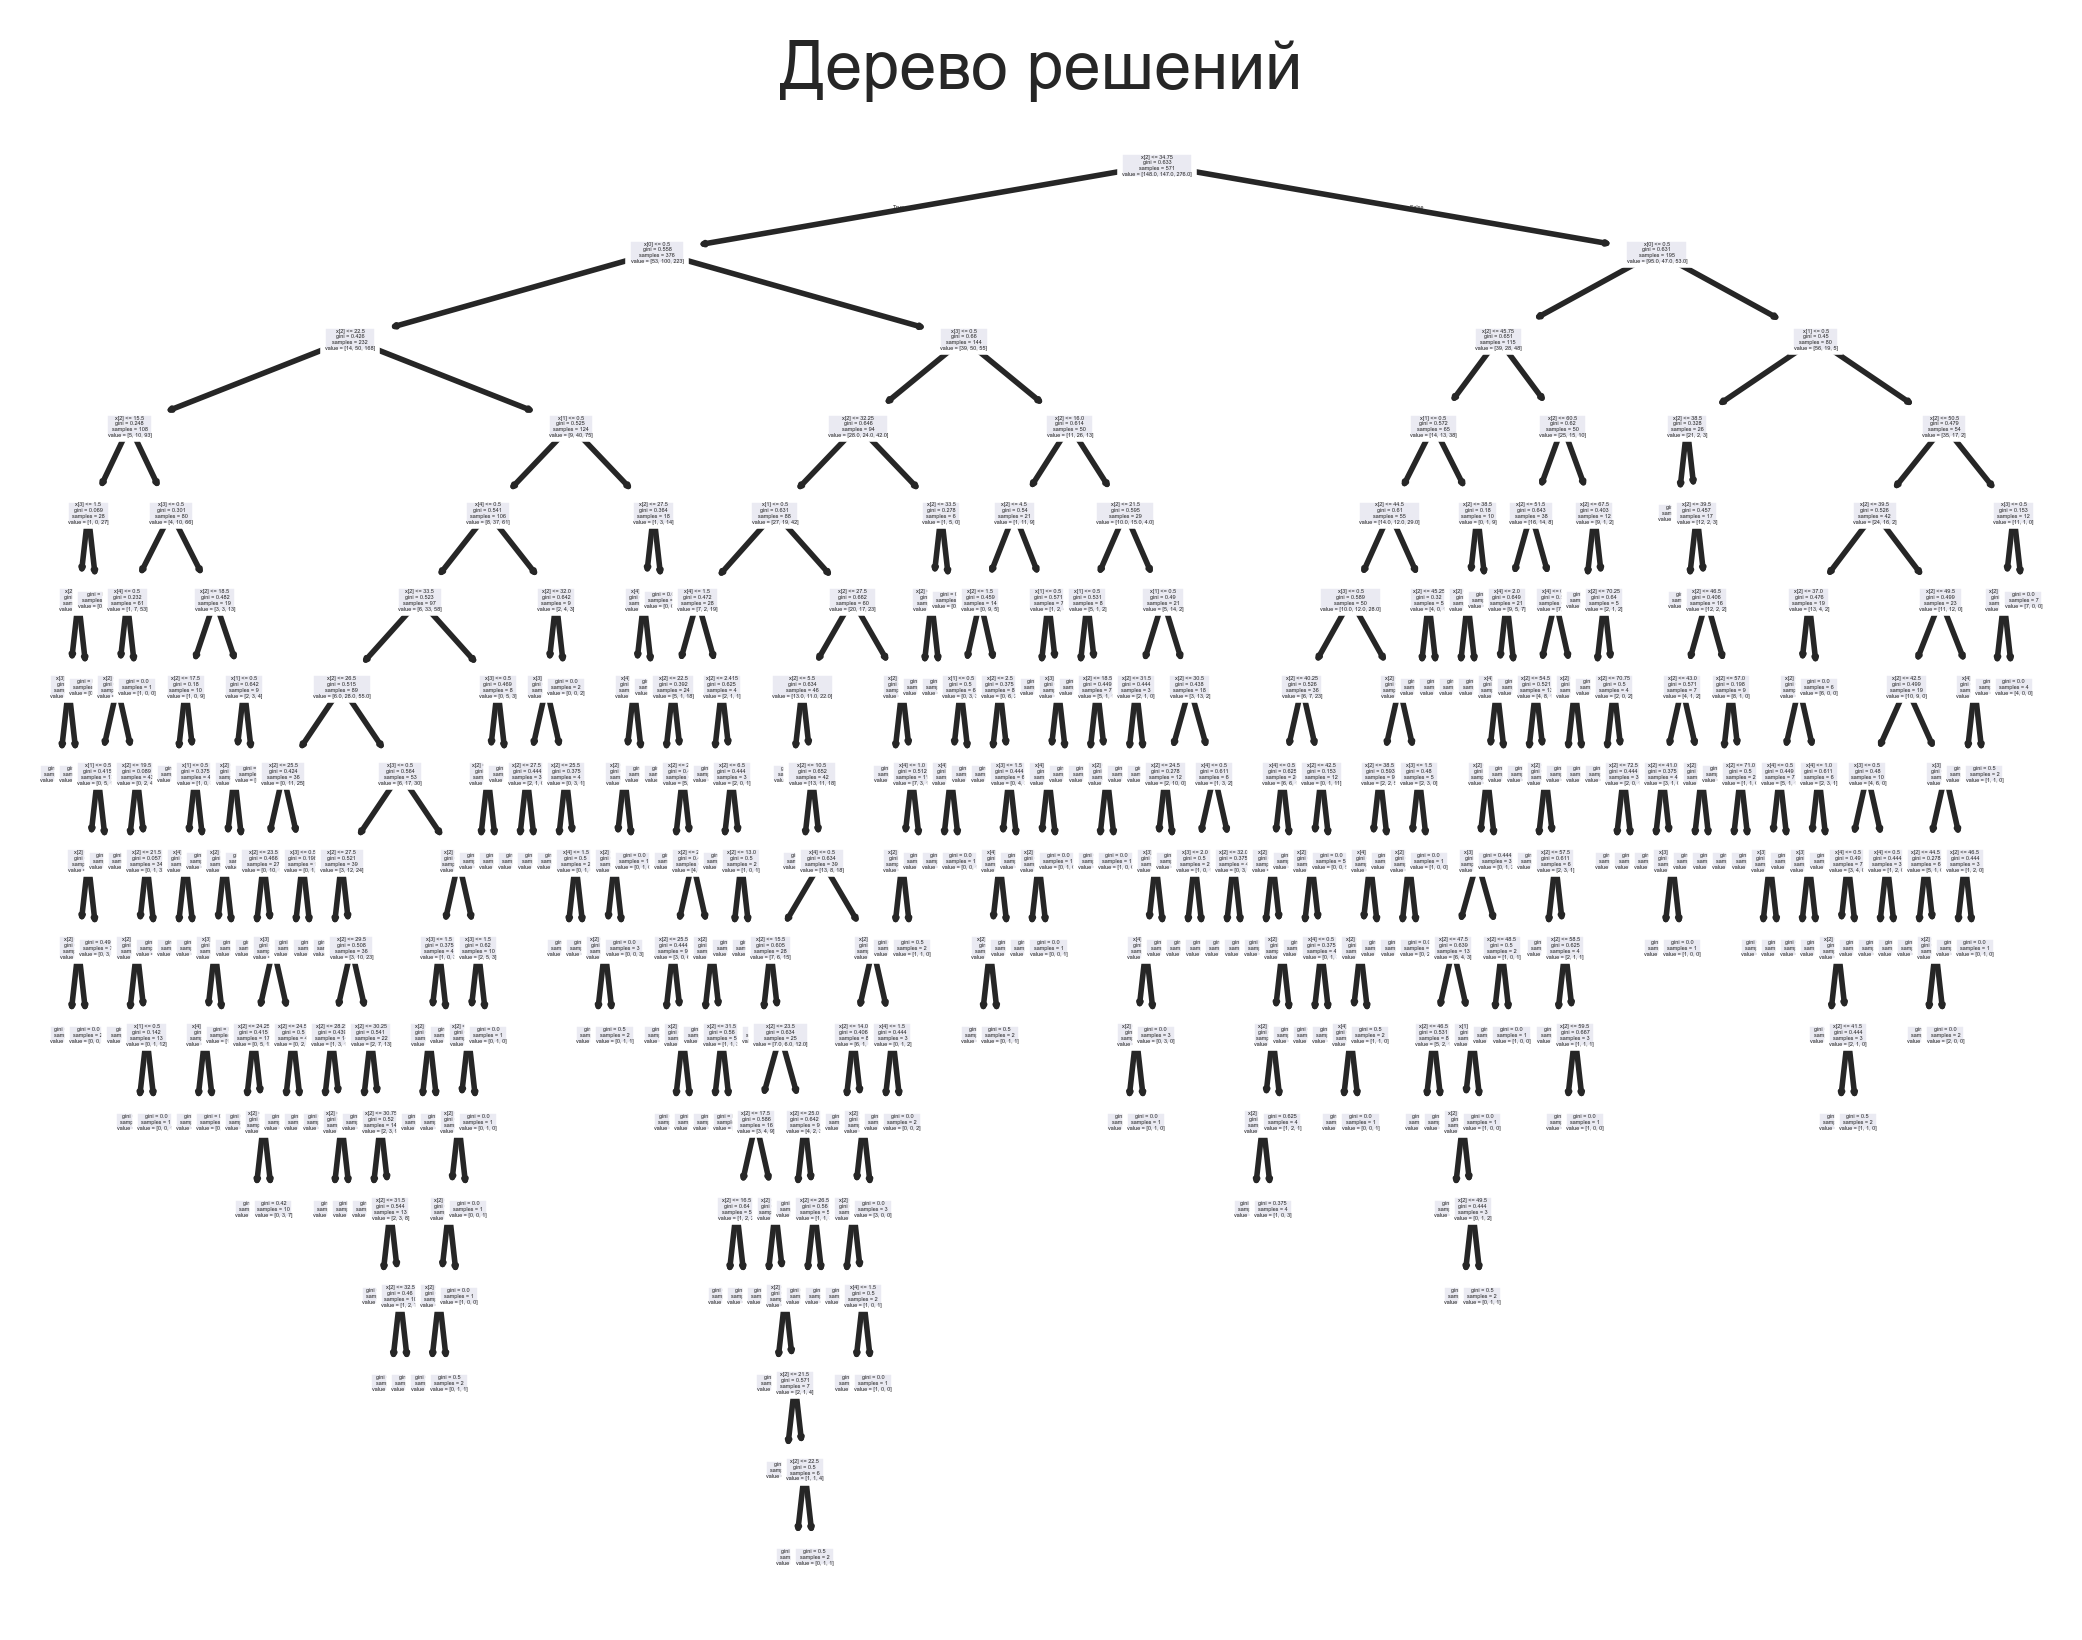

In [99]:
DPI = 400
plt.figure(dpi=DPI)
tree.plot_tree(model)
plt.title("Дерево решений")